In [2]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import matplotlib.pyplot as plt
from scipy.ndimage import gaussian_filter1d
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [3]:
df = pd.read_excel("Задания/Datasets/kuiper.xls")
df.head(20)

,Price,Mileage,Make,Model,Trim,Type,Cylinder,Liter,Doors,Cruise,Sound,Leather
0,17314.103129,8221,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1
1,17542.036083,9135,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
2,16218.847862,13196,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
3,16336.913140,16342,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,0
4,16339.170324,19832,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
5,15709.052821,22236,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
6,15230.003390,22576,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
7,15048.042184,22964,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,0
8,14862.093870,24021,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,0,1
9,15295.018267,27325,Buick,Century,Sedan 4D,Sedan,6,3.1,4,1,1,1


In [4]:
X = df.drop(['Price','Make','Model','Trim','Type'],axis=1)
y = df['Price']

### Квантильная регрессия — это метод, который позволяет моделировать зависимость между переменными, учитывая не только среднее значение зависимой переменной, как это делает обычная линейная регрессия, но и её различные квантильные уровни. 

*	Если  \tau = 0.25 , то модель предсказывает 25-й перцентиль, то есть значение, ниже которого лежит 25% наблюдений.
*	Если  \tau = 0.75 , то модель предсказывает 75-й перцентиль, то есть значение, ниже которого лежит 75% наблюдений.


/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/

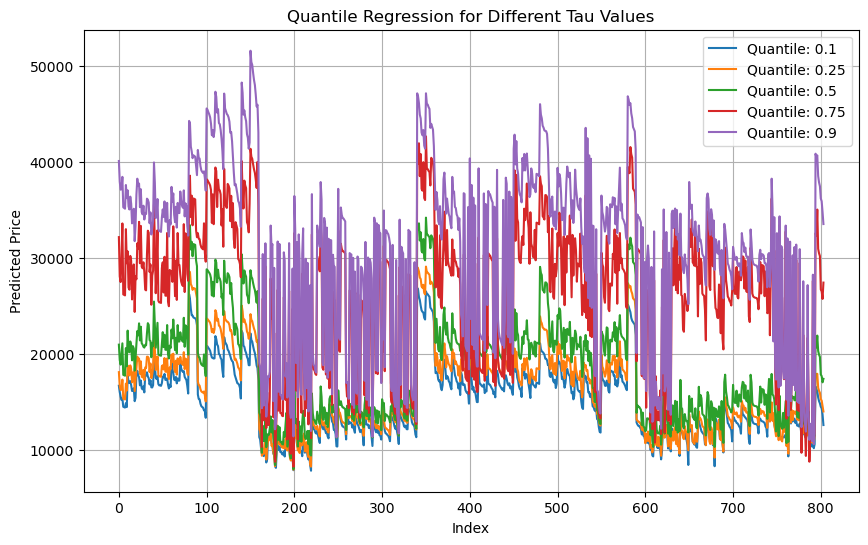

/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +
/opt/anaconda3/envs/

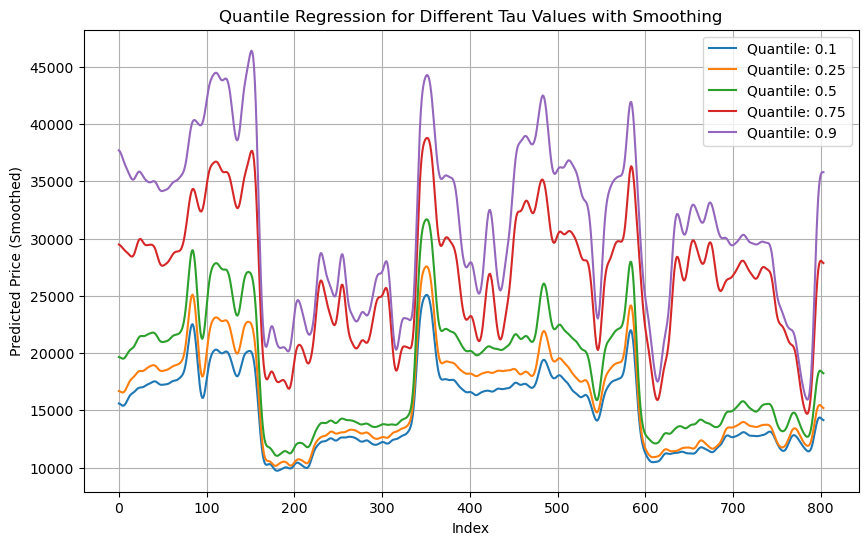

In [5]:
#1,2
# Adding a constant for the intercept
X = sm.add_constant(X)

# Tau values for quantile regression
taus = [0.1, 0.25, 0.5, 0.75, 0.9]

plt.figure(figsize=(10, 6))

# Building quantile regression for each tau
for tau in taus:
    model = sm.QuantReg(y, X).fit(q=tau)
    y_pred = model.predict(X)
    plt.plot(y_pred, label=f'Quantile: {tau}')

plt.title('Quantile Regression for Different Tau Values')
plt.xlabel('Index')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()
plt.show()

plt.figure(figsize=(10, 6))

# Building quantile regression for each tau with smoothing
for tau in taus:
    model = sm.QuantReg(y, X).fit(q=tau)
    y_pred = model.predict(X)

    # Smoothing using Gaussian filter
    y_pred_smoothed = gaussian_filter1d(y_pred, sigma=4)  # The sigma parameter controls the smoothing level

    plt.plot(y_pred_smoothed, label=f'Quantile: {tau}')

plt.title('Quantile Regression for Different Tau Values with Smoothing')
plt.xlabel('Index')
plt.ylabel('Predicted Price (Smoothed)')
plt.legend()
plt.grid()
plt.show()

### Квантильная регрессия — это метод регрессии, который позволяет оценивать условные квантильные функции. Она полезна для определения моментов распределения: например, медианы.

/opt/anaconda3/envs/math_stat/lib/python3.11/site-packages/statsmodels/regression/quantile_regression.py:191: IterationLimitWarning: Maximum number of iterations (1000) reached.
  warnings.warn("Maximum number of iterations (" + str(max_iter) +


Linear Regression:
RMSE: 7351.08
R²: 0.4463

Median Regression:
RMSE: 8350.02
R²: 0.2855



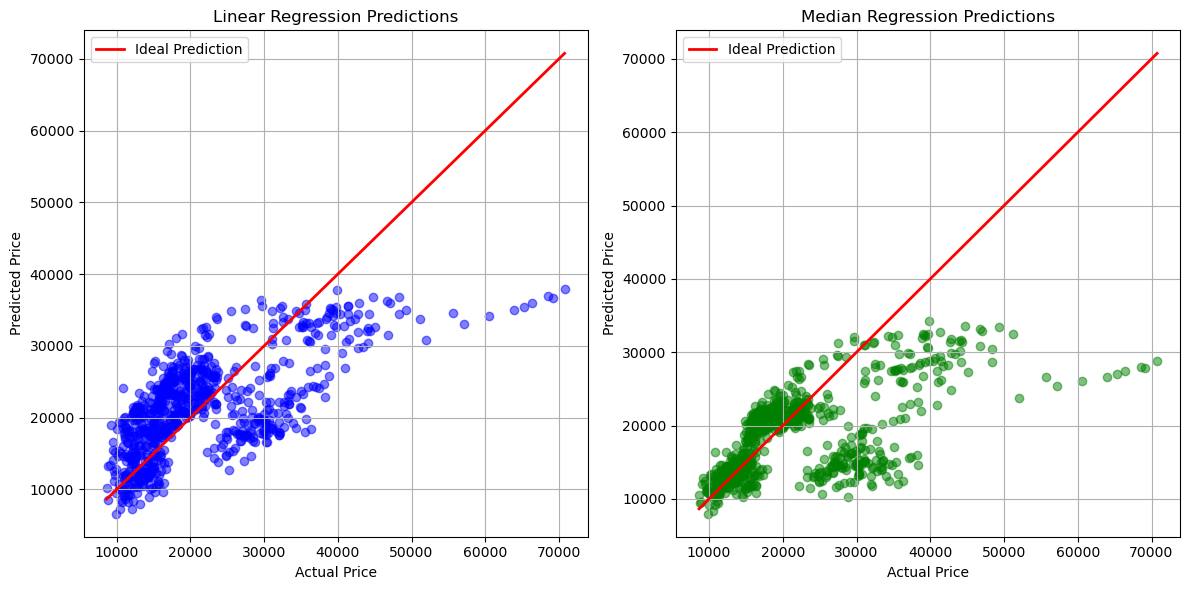

In [6]:
#3
# Adding a constant for the intercept in the OLS model
X_ols = sm.add_constant(X)

# 1. Building the linear regression model
lin_reg = LinearRegression()
lin_reg.fit(X, y)
y_pred_lin = lin_reg.predict(X)

# 2. Building the median regression model (quantile regression for τ=0.5)
model_median = sm.QuantReg(y, X_ols).fit(q=0.5)
y_pred_median = model_median.predict(X_ols)

# 3. Calculating metrics for linear regression
mse_lin = mean_squared_error(y, y_pred_lin)
r2_lin = r2_score(y, y_pred_lin)

# 4. Calculating metrics for median regression
mse_median = mean_squared_error(y, y_pred_median)
r2_median = r2_score(y, y_pred_median)

print("Linear Regression:")
print(f"RMSE: {np.sqrt(mse_lin):.2f}")
print(f"R²: {r2_lin:.4f}\n")

print("Median Regression:")
print(f"RMSE: {np.sqrt(mse_median):.2f}")
print(f"R²: {r2_median:.4f}\n")

plt.figure(figsize=(12, 6))

# Plot for linear regression
plt.subplot(1, 2, 1)
plt.scatter(y, y_pred_lin, color='blue', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.title('Linear Regression Predictions')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()

# Plot for median regression
plt.subplot(1, 2, 2)
plt.scatter(y, y_pred_median, color='green', alpha=0.5)
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal Prediction')
plt.title('Median Regression Predictions')
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()

### В этом случае линейная регрессия окозалась более точной чем медианная 

### Медианная регрессия - квантильная регрессия для  \tau = 0.5 